A primer on numerical differentiation
========================

In order to numerically evaluate a derivative $y'(x)=dy/dx$ at point $x_0$, we approximate is by using finite differences:
Therefore we find: $$\begin{eqnarray}
&& dx \approx \Delta x &=&x_1-x_0, \\
&& dy \approx \Delta y &=&y_1-y_0 = y(x_1)-y(x_0) = y(x_0+\Delta_x)-y(x_0),\end{eqnarray}$$

Then we re-write the derivative in terms of discrete differences as:
$$\frac{dy}{dx} \approx \frac{\Delta y}{\Delta x}$$

#### Example

Let's look at the accuracy of this approximation in terms of the interval $\Delta x$. In our first example we will evaluate the derivative of $y=x^2$ at $x=1$.

In [1]:
dx = 1.
x = 1.
while(dx > 1.e-10):
    dy = (x+dx)*(x+dx)-x*x
    d = dy / dx
    print("%6.0e %20.16f %20.16f" % (dx, d, d-2.))
    dx = dx / 10.
    

 1e+00   3.0000000000000000   1.0000000000000000
 1e-01   2.1000000000000019   0.1000000000000019
 1e-02   2.0100000000000007   0.0100000000000007
 1e-03   2.0009999999996975   0.0009999999996975
 1e-04   2.0000999999991720   0.0000999999991720
 1e-05   2.0000100000139298   0.0000100000139298
 1e-06   2.0000009999243669   0.0000009999243669
 1e-07   2.0000001010878061   0.0000001010878061
 1e-08   1.9999999878450576  -0.0000000121549424
 1e-09   2.0000001654807416   0.0000001654807416
 1e-10   2.0000001654807416   0.0000001654807416


Why is it that the sequence does not converge? This is due to the round-off errors in the representation of the floating point numbers. To see this, we can simply type:

In [2]:
((1.+0.0001)*(1+0.0001)-1)

0.0002000099999999172

Let's try using powers of 1/2

In [3]:
dx = 1.
x = 1.
while(dx > 1.e-10):
    dy = (x+dx)*(x+dx)-x*x
    d = dy / dx
    print("%8.5e %20.16f %20.16f" % (dx, d, d-2.))
    dx = dx / 2.

1.00000e+00   3.0000000000000000   1.0000000000000000
5.00000e-01   2.5000000000000000   0.5000000000000000
2.50000e-01   2.2500000000000000   0.2500000000000000
1.25000e-01   2.1250000000000000   0.1250000000000000
6.25000e-02   2.0625000000000000   0.0625000000000000
3.12500e-02   2.0312500000000000   0.0312500000000000
1.56250e-02   2.0156250000000000   0.0156250000000000
7.81250e-03   2.0078125000000000   0.0078125000000000
3.90625e-03   2.0039062500000000   0.0039062500000000
1.95312e-03   2.0019531250000000   0.0019531250000000
9.76562e-04   2.0009765625000000   0.0009765625000000
4.88281e-04   2.0004882812500000   0.0004882812500000
2.44141e-04   2.0002441406250000   0.0002441406250000
1.22070e-04   2.0001220703125000   0.0001220703125000
6.10352e-05   2.0000610351562500   0.0000610351562500
3.05176e-05   2.0000305175781250   0.0000305175781250
1.52588e-05   2.0000152587890625   0.0000152587890625
7.62939e-06   2.0000076293945312   0.0000076293945312
3.81470e-06   2.000003814697

In addition, one could consider the midpoint difference, defined as:
$$ dy \approx \Delta y = y(x_0+\frac{\Delta_x}{2})-y(x_0-\frac{\Delta_x}{2}).$$

For a more complex function we need to import it from the math module. For instance, let's calculate the derivative of $sin(x)$ at $x=\pi/4$, including both the forward and midpoint differences.

In [1]:
from math import sin, sqrt, pi
dx = 1.
while(dx > 1.e-10):
    x = pi/4.
    d1 = sin(x+dx) - sin(x); #forward
    d2 = sin(x+dx*0.5) - sin(x-dx*0.5); # midpoint
    d1 = d1 / dx;
    d2 = d2 / dx;
    print("%8.5e %20.16f %20.16f %20.16f %20.16f" % (dx, d1, d1-sqrt(2.)/2., d2, d2-sqrt(2.)/2.) )
    dx = dx / 2.

1.00000e+00   0.2699544827129282  -0.4371522984736194   0.6780100988420897  -0.0290966823444578
5.00000e-01   0.5048856975964859  -0.2022210835900616   0.6997640691250939  -0.0073427120614536
2.50000e-01   0.6118351194488110  -0.0952716617377366   0.7052667953545546  -0.0018399858319930
1.25000e-01   0.6611301360648314  -0.0459766451217162   0.7066465151141266  -0.0004602660724210
6.25000e-02   0.6845566203276618  -0.0225501608588857   0.7069916978116613  -0.0001150833748863
3.12500e-02   0.6959440534591224  -0.0111627277274252   0.7070780092891873  -0.0000287718973603
1.56250e-02   0.7015538499518499  -0.0055529312346977   0.7070995881463560  -0.0000071930401916
7.81250e-03   0.7043374663312676  -0.0027693148552800   0.7071049829223881  -0.0000017982641595
3.90625e-03   0.7057239167465070  -0.0013828644400405   0.7071063316202526  -0.0000004495662950
1.95312e-03   0.7064157978737740  -0.0006909833127736   0.7071066687949497  -0.0000001123915979
9.76562e-04   0.7067614018394579  -0.000

A more in-depth discussion about round-off errors in numerical differentiation can be found <a href="http://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h10/kompendiet/kap11.pdf">here</a>

### Special functions in **numpy**

numpy provides a simple method **diff()** to calculate the numerical derivatives of a dataset stored in an array by forward differences. The function **gradient()** will calculate the derivatives by midpoint (or central) difference, that provides a more accurate result. 

[ 1.  2.  4.  6.  8. 10. 12. 14. 16. 17.]


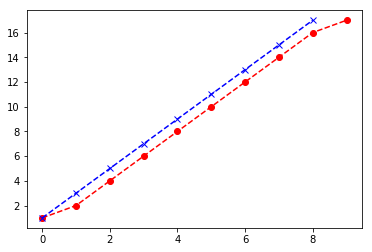

In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

y = lambda x: x*x

x1 = np.arange(0,10,1)
x2 = np.arange(0,10,0.1)

y1 = np.gradient(y(x1), 1.)
print (y1)

pyplot.plot(x1,np.gradient(y(x1),1.),'r--o');
pyplot.plot(x1[:x1.size-1],np.diff(y(x1))/np.diff(x1),'b--x');

Notice above that **gradient()** uses forward and backward differences at the two ends.

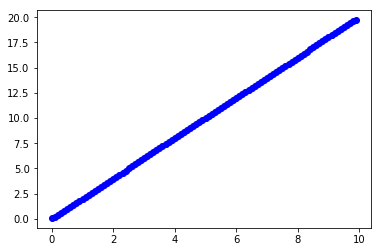

In [6]:
pyplot.plot(x2,np.gradient(y(x2),0.1),'b--o');

More discussion about numerical differenciation, including higher order methods with error extrapolation can be found <a href="http://young.physics.ucsc.edu/115/diff.pdf">here</a>. 

The module **scipy** also includes methods to accurately calculate derivatives:

In [7]:
from scipy.misc import derivative

y = lambda x: x**2

dx = 1.
x = 1.

while(dx > 1.e-10):
    d = derivative(y, x, dx, n=1, order=3)
    print("%6.0e %20.16f %20.16f" % (dx, d, d-2.))
    dx = dx / 10.

 1e+00   2.0000000000000000   0.0000000000000000
 1e-01   2.0000000000000004   0.0000000000000004
 1e-02   2.0000000000000018   0.0000000000000018
 1e-03   1.9999999999998352  -0.0000000000001648
 1e-04   1.9999999999992246  -0.0000000000007754
 1e-05   2.0000000000020002   0.0000000000020002
 1e-06   2.0000000000019997   0.0000000000019997
 1e-07   2.0000000000575109   0.0000000000575109
 1e-08   1.9999999933961727  -0.0000000066038273
 1e-09   2.0000000544584391   0.0000000544584391
 1e-10   2.0000001654807416   0.0000001654807416


One way to improve the roundoff errors is by simply using the **decimal** package

In [126]:
from decimal import Decimal

dx = Decimal("1.")
while(dx >= Decimal("1.e-10")):
    x = Decimal("1.")
    dy = (x+dx)*(x+dx)-x*x
    d = dy / dx
    print("%6.0e %20.16f %20.16f" % (dx, d, d-Decimal("2.")))
    dx = dx / Decimal("10.")

 1e+00   3.0000000000000000   1.0000000000000000
 1e-01   2.1000000000000001   0.1000000000000000
 1e-02   2.0099999999999998   0.0100000000000000
 1e-03   2.0009999999999999   0.0010000000000000
 1e-04   2.0001000000000002   0.0001000000000000
 1e-05   2.0000100000000001   0.0000100000000000
 1e-06   2.0000010000000001   0.0000010000000000
 1e-07   2.0000000999999998   0.0000001000000000
 1e-08   2.0000000099999999   0.0000000100000000
 1e-09   2.0000000010000001   0.0000000010000000
 1e-10   2.0000000001000000   0.0000000001000000
